In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise,ST depression,Slope of ST,Number of vessels fluro,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise                 270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 27.6+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
df['Heart Disease Encoded'] = le.fit_transform(df['Heart Disease'])

In [20]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Heart Disease Encoded
0,70,1,4,130,322,0,2,109,0,2.4,2,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,Absence,0


In [9]:
corr_matrix = df.corr()

C:\Users\compaid sangli\AppData\Local\Temp\ipykernel_5400\3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Correlation matrix')

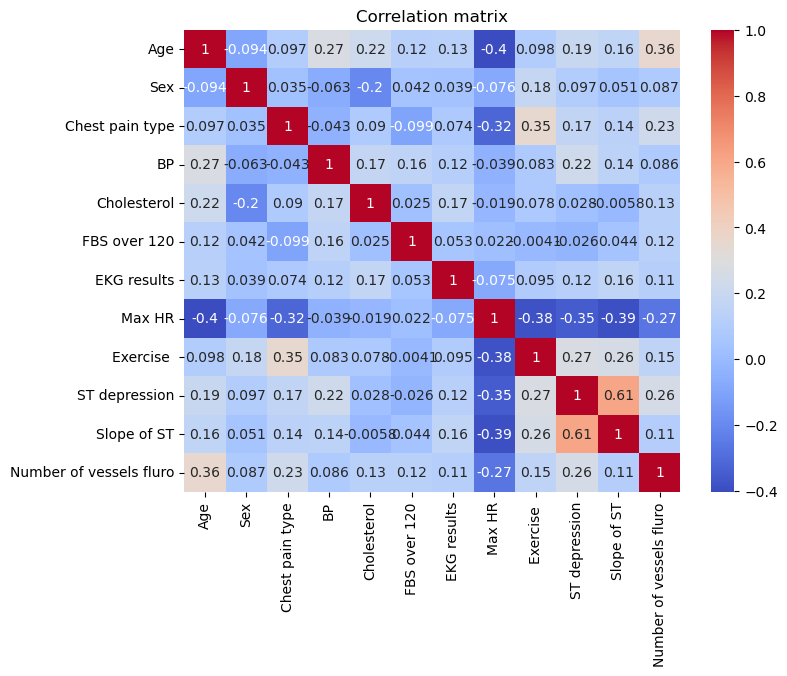

In [42]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation matrix')

In [62]:
x = df[['Chest pain type','Slope of ST', 'ST depression']]
y = df[['Heart Disease Encoded']]

In [63]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [71]:
reg.score(x_train, y_train)

0.783068783068783

In [75]:
reg.predict([[5,2,2.4]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])